In [1]:
import numpy as np
from matplotlib import  pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
!git --version


git version 2.17.1


In [2]:
!git clone https://github.com/abrehamgezahegn/image-data.git /content/datasets

fatal: destination path '/content/datasets' already exists and is not an empty directory.


In [2]:
f = np.load('/content/datasets/X.npz')
X = f['arr_0']
X.shape

(17615, 100, 100)

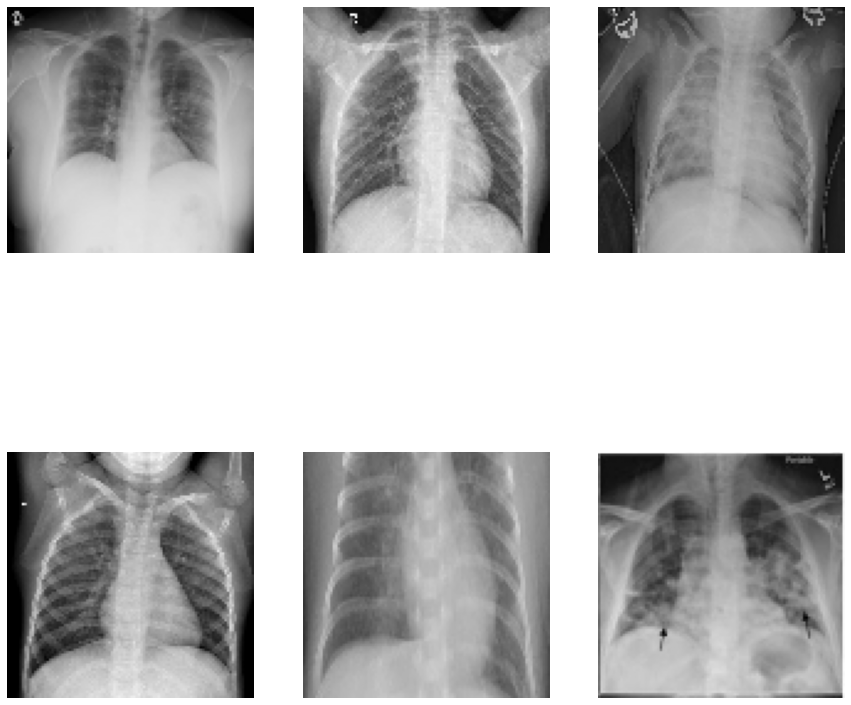

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X[i], cmap="gray")
    plt.axis("off")

In [3]:
y = np.load("/content/datasets/y.npy")

In [4]:
y[0:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [5]:
X, y = shuffle(X, y, random_state=0)

In [6]:
X = X / 255

In [7]:
X.shape

(17615, 100, 100)

In [8]:
X = np.stack([X]*3, -1)
X.shape

(17615, 100, 100, 3)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.shape

(14092, 100, 100, 3)

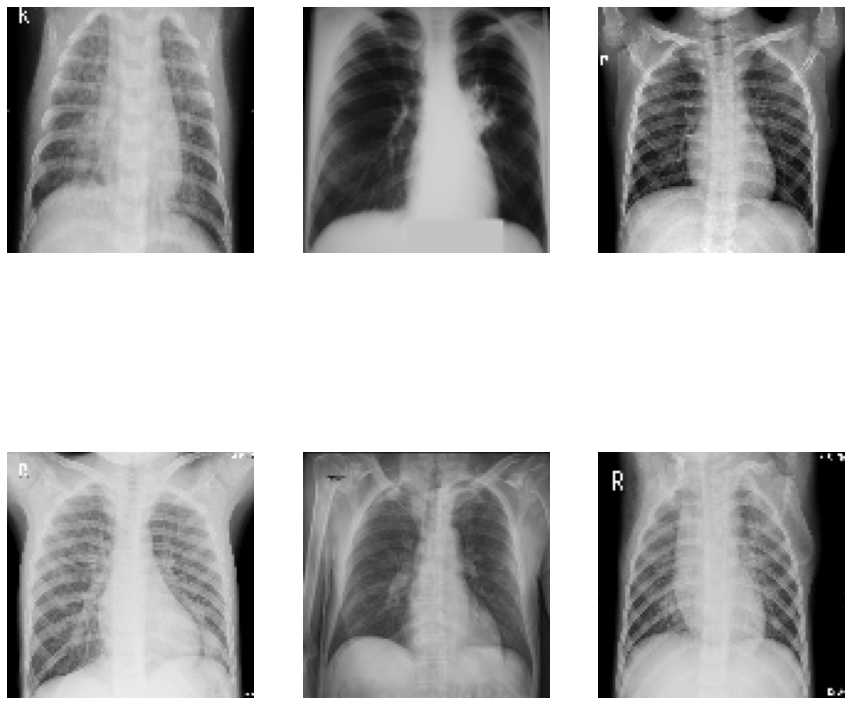

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis("off")

In [12]:
from tensorflow.keras.layers import Conv2D , Input, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers , callbacks



In [10]:
input_shape = (100,100,3)

# data_augmentation = Sequential(
#   [
#     layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=input_shape ),
#     layers.experimental.preprocessing.RandomRotation(0.2),
#     layers.experimental.preprocessing.RandomZoom(0.2),
#     # layers.experimental.preprocessing.RandomTranslation(
#     #   0.5, 0, fill_mode="nearest"
#     #   )

#   ]
# )

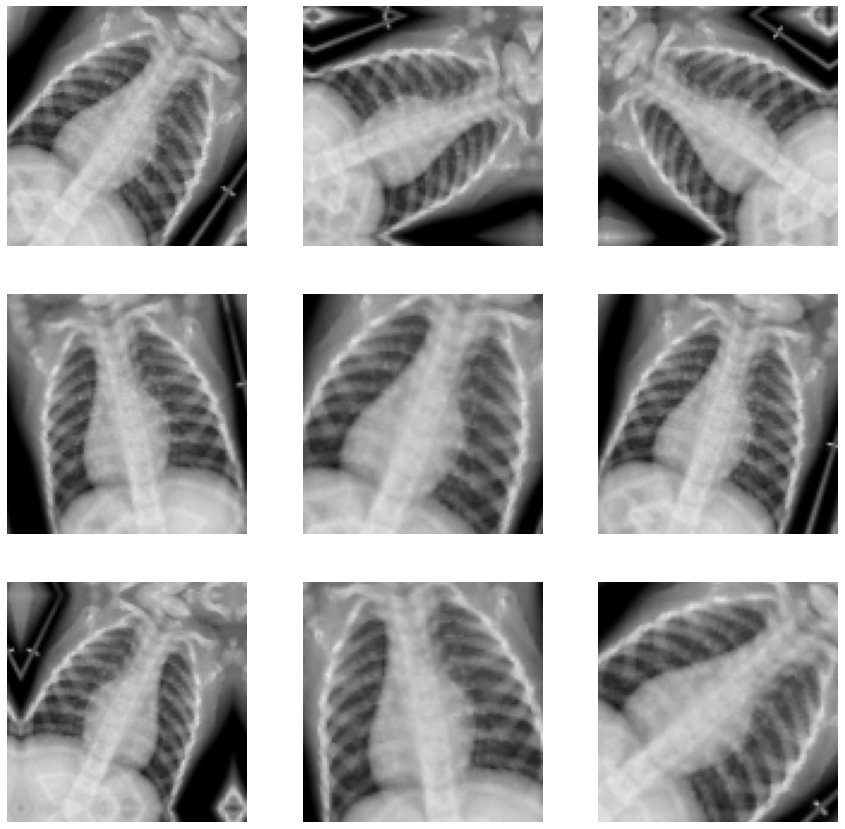

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(9):
    augmented_images = data_augmentation(X_train[10:15])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[4])
    plt.axis("off")

In [13]:
i = Input(shape=input_shape)
# x = data_augmentation(i)

# x = Conv2D(32, (3,3) , strides=(2,2), activation="relu" )(x)
# x = BatchNormalization()(x)
# x = Conv2D(64, (3,3) , strides=(2,2) ,activation="relu" )(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3,3) , strides=(2,2) ,activation="relu" )(x)


x = Conv2D(32, (3,3)  , activation="relu" , padding="same")(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3)  , activation="relu", padding="same" )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)



x = Conv2D(64, (3,3)  , activation="relu" , padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3)  , activation="relu", padding="same" )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)




x = Conv2D(128, (3,3)  , activation="relu" , padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3)  , activation="relu", padding="same" )(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)


x = Flatten()(x)

x = Dropout(0.2)(x) 
x = BatchNormalization()(x)
x = Dense(128,   activation="relu")(x)

x = Dropout(0.2)(x)
x = BatchNormalization()(x)
x = Dense(32, activation="relu")(x)

x = Dropout(0.2)(x)
x = Dense(10,  activation="softmax")(x)

model = Model(i,x)



In [14]:
es = callbacks.EarlyStopping( monitor="val_loss", patience=6, restore_best_weights=True, verbose=1, min_delta=0.01)
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)
cbs = [es,mc]

In [15]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,metrics=["accuracy"] , loss="sparse_categorical_crossentropy")

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496 

In [18]:
r = model.fit(X_train[0:14092], y_train[0:14092] , validation_data=(X_test[14093:17615], y_test[14093:17615]) , epochs=15, batch_size=32, callbacks=cbs)

Epoch 1/15
157/157 [==============================] - 381s 2s/step - loss: 1.0090 - accuracy: 0.6932 - val_loss: 2.7129 - val_accuracy: 0.2200
Epoch 2/15
157/157 [==============================] - 384s 2s/step - loss: 0.5953 - accuracy: 0.8104 - val_loss: 2.1804 - val_accuracy: 0.4750
Epoch 3/15
157/157 [==============================] - 388s 2s/step - loss: 0.4374 - accuracy: 0.8648 - val_loss: 1.1795 - val_accuracy: 0.5480
Epoch 4/15
157/157 [==============================] - 386s 2s/step - loss: 0.3423 - accuracy: 0.8942 - val_loss: 0.4173 - val_accuracy: 0.8570
Epoch 5/15
157/157 [==============================] - 386s 2s/step - loss: 0.2737 - accuracy: 0.9128 - val_loss: 0.3346 - val_accuracy: 0.8710
Epoch 6/15
157/157 [==============================] - 385s 2s/step - loss: 0.2245 - accuracy: 0.9340 - val_loss: 0.2882 - val_accuracy: 0.9070
Epoch 7/15
157/157 [==============================] - 388s 2s/step - loss: 0.1861 - accuracy: 0.9418 - val_loss: 0.3053 - val_accuracy: 0.8920

KeyboardInterrupt: ignored

In [23]:
def plot_acc_graph(history): 
  # Plot loss per iteration
  plt.plot(history['accuracy'], label='acc')
  plt.plot(history['val_accuracy'], label='val_acc')
  plt.legend()

In [24]:
def plot_loss_graph(history): 
  # Plot loss per iteration
  plt.plot(history['loss'], label='loss')
  plt.plot(history['val_loss'], label='val_loss')
  plt.legend()

In [25]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)


  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

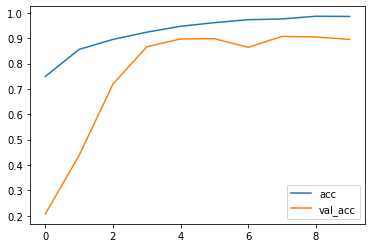

In [27]:
plot_acc_graph(r.history)

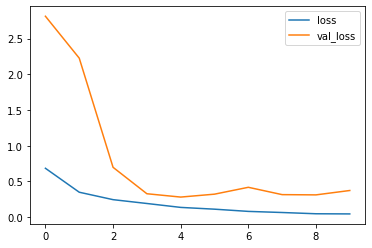

In [28]:
plot_loss_graph(r.history)

Confusion matrix, without normalization
[[729   4   2  21   2]
 [  4 604  93   0  14]
 [  2  86 597   0  18]
 [ 10   2   0 626   2]
 [  0   0   1   2 703]]


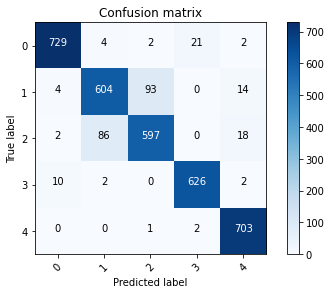

In [29]:
predictions = model.predict(X[14093:17615]).argmax(axis=1)
cm = confusion_matrix(y[14093:17615], predictions)
plot_confusion_matrix(cm, list(range(5)))
